# Fase 5 
# Alejandro Serrano 
# Regresión Logística
# Analisis de datos  


In [8]:
 #Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos\n",
import numpy as np # Cálculo numérico y el análisis de datos\n",
import seaborn as sns # Creación gráficos estadísticos\n",
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('C:/Titanic-Dataset.csv')

In [12]:
#Revisión del tipo de datos 

Datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# Realizamos la lectura de los datos para el análisis exploratorio


Datos.head(30)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
# Descripción de los datos, como media, maximo y minimo, etc.
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

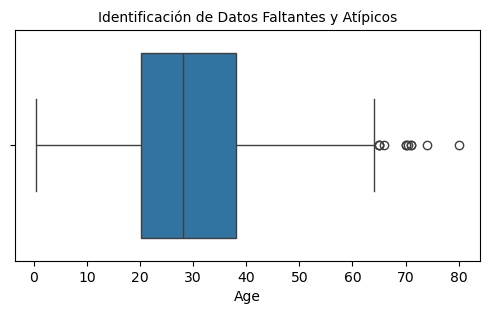

In [22]:
#Identificación de Datos Faltantes y Atípicos edad
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

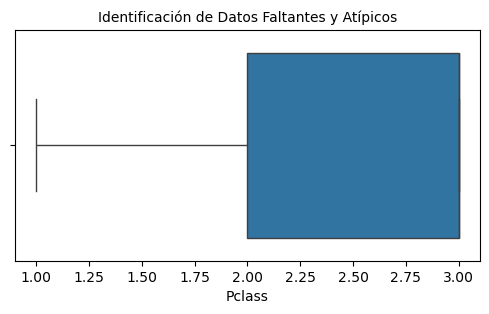

In [24]:

#Identificación de Datos Faltantes y Atípicos clase de pasajero
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

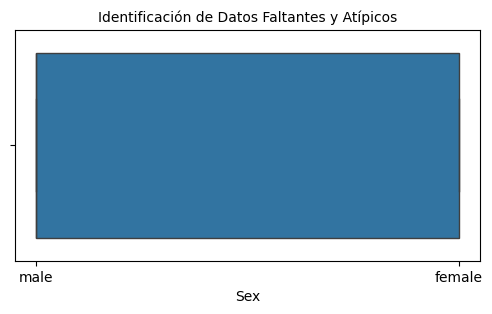

In [26]:
#Identificación de Datos Faltantes y Atípicos clase de Sexo
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Sex'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [28]:
#2. Procesar los datos limpiándolos, tratando valores faltantes y transformándols según sea necesario

# Revisión de datos faltantes se determinan que no hay datos faltantes se validan cada una de las columnas, por tal motivo solo se realiza la consulta y no se puede quitar los 0 debido a que son de vital importancia como lo son en sex: 0 = Femenino, 1 = Masculino,  etcétera. 
print(Datos.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [32]:
# Reemplazar valores faltantes en 'Age' con el promedio de la columna
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].mean())

# Reemplazar valores faltantes en 'Cabin' con una categoría especial como 'Unknown'
Datos['Cabin'] = Datos['Cabin'].fillna('Unknown')

# Reemplazar valores faltantes en 'Embarked' con la moda (valor más frecuente)
Datos['Embarked'] = Datos['Embarked'].fillna(Datos['Embarked'].mode()[0])


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

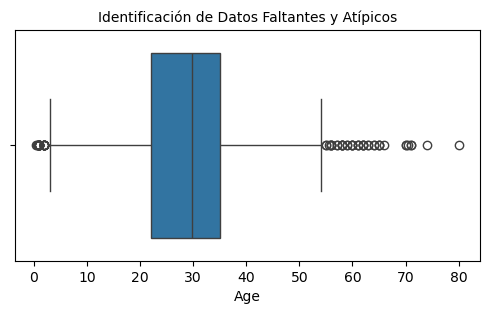

In [34]:
#Identificación de Datos Faltantes y Atípicos edad
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [36]:
#conteo de datos Atípicos de edad

nivel_minimo=0
nivel_maximo=4
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))


El total de datos atípicos es 851


In [38]:
# Filtrar los datos para conservar solo los registros con edad mayor o igual a 18 años. Ya que los menores tenian prioridad 
Datos = Datos[Datos['Age'] >= 18]


In [42]:
#verificamos

print("Tamaño del conjunto de datos después del filtrado:", Datos.shape)


Tamaño del conjunto de datos después del filtrado: (778, 12)


In [44]:
#conteo de datos Atípicos de edad nuevamente 

nivel_minimo=0
nivel_maximo=4
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))



El total de datos atípicos es 778


In [46]:
#Revisión del tipo de datos y datos faltantes

Datos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  778 non-null    int64  
 1   Survived     778 non-null    int64  
 2   Pclass       778 non-null    int64  
 3   Name         778 non-null    object 
 4   Sex          778 non-null    object 
 5   Age          778 non-null    float64
 6   SibSp        778 non-null    int64  
 7   Parch        778 non-null    int64  
 8   Ticket       778 non-null    object 
 9   Fare         778 non-null    float64
 10  Cabin        778 non-null    object 
 11  Embarked     778 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 79.0+ KB


In [48]:
# 3 seleccionar las caracteristicas Más relevantes para entrenar el modelo utilizado

#	Sobrevivio o no :
#0 significa que la persona no sobrevivió.
#1 significa que la persona sí sobrevivió.

In [52]:
#Total de personas que sobrevivió
Datos['Survived'].value_counts()

Survived
0    497
1    281
Name: count, dtype: int64

In [56]:
Datos[['Survived']].head(15)
#ver la distribución de los datos

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
8,1
11,1
12,0


In [62]:
#4. Dividir el dataset en Train y Test para evalaur correctamente el modelo

# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
    
# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) 
Y = Datos['Survived'] 

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)



In [64]:
print (X_train)
#Sobrevivientes


     PassengerId  Pclass                             Name     Sex        Age  \
582          583       2       Downton, Mr. William James    male  54.000000   
887          888       1     Graham, Miss. Margaret Edith  female  19.000000   
692          693       3                     Lam, Mr. Ali    male  29.699118   
594          595       2          Chapman, Mr. John Henry    male  37.000000   
882          883       3     Dahlberg, Miss. Gerda Ulrika  female  22.000000   
..           ...     ...                              ...     ...        ...   
703          704       3            Gallagher, Mr. Martin    male  25.000000   
607          608       1      Daniel, Mr. Robert Williams    male  27.000000   
800          801       2             Ponesell, Mr. Martin    male  34.000000   
604          605       1  Homer, Mr. Harry ("Mr E Haven")    male  35.000000   
57            58       3              Novel, Mr. Mansouer    male  28.500000   

     SibSp  Parch       Ticket     Fare

In [70]:
#  saber quiénes sobrevivieron o no en el conjunto de entrenamiento
#0: La persona no sobrevivió.
#1: La persona sobrevivió

print (Y_train)


582    0
887    1
692    1
594    0
882    0
      ..
703    0
607    1
800    0
604    1
57     0
Name: Survived, Length: 583, dtype: int64


#5. Entrenar el modelo configurando los diferentes hiperparámetros


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Eliminar columnas irrelevantes debido a que me daba un error debido a que no estaban bien procesados
X = Datos.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

# Codificar variables categóricas
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])  # 0 para female, 1 para male
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)  # One-hot encoding para 'Embarked'

# Definir las etiquetas
Y = Datos['Survived']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

# Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train, Y_train)

# Predecir resultados en el conjunto de prueba
Prediccion = modelo_regresion.predict(X_test)
print(Prediccion)


[0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 0]


In [77]:
print (Y_test)

833    0
470    0
392    0
522    0
452    0
      ..
856    1
27     0
525    0
630    1
666    0
Name: Survived, Length: 195, dtype: int64


#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas 

#me indica que tan bien quedo el modelo

In [80]:
# Desempeño del modelo de regresión
#0: La persona no sobrevivió.
#1: La persona sobrevivió

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       125
           1       0.74      0.70      0.72        70

    accuracy                           0.81       195
   macro avg       0.79      0.78      0.79       195
weighted avg       0.80      0.81      0.80       195



##7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo"

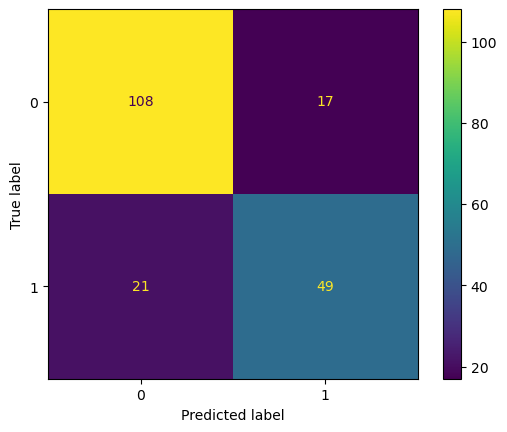

In [83]:
#Matrix de Confusión del modelo
#0: La persona no sobrevivió 108 acerto el modelo.
#1: La persona sobrevivió 49 y fueron correctamente clasificadas
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

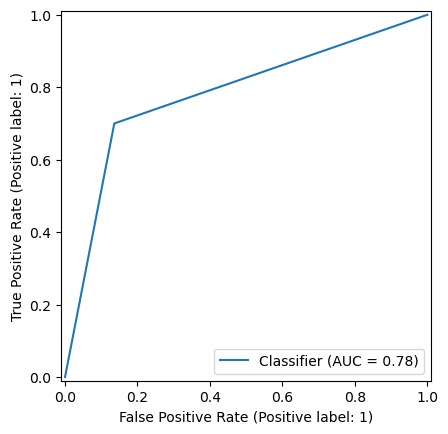

In [85]:
#Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()
